<a href="https://colab.research.google.com/github/SumathiGit/Defect-Detection-Food-Package/blob/main/vgg19_DD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import zipfile
import pandas as pd
import numpy as np

In [3]:
img_zip_path = '/content/drive/My Drive/Defect_Detection_Dataset/Fastai_DD/Fastai_Defect_Detection_Img.zip'

In [4]:
zip_ref = zipfile.ZipFile(img_zip_path, 'r')
zip_ref.extractall("Files")
zip_ref.close()

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 24kB/s 
     |████████████████████████████████| 4.0MB 49.0MB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102


In [7]:
from fastai import *
from fastai.vision import *

import os
import sys
import requests
from io import BytesIO

In [8]:
!ls

drive  Files  sample_data


In [9]:
os.listdir('Files')

['Defect_Detection_Img']

In [10]:
""" Creating DataBunch """

' Creating DataBunch '

In [11]:
tfms = get_transforms()

img_src = "Files"
src = (ImageList.from_folder(img_src) #set image folder
       .split_by_rand_pct(0.3) #set the split of training and validation to 70/30
       .label_from_folder(label_delim='_')) #get label names from folder and split by underscore (For more Labels)

data = (src.transform(tfms, size=256) #set image size to 256
        .databunch(num_workers=0).normalize(imagenet_stats))

Classes in our data: ['Beans', 'BeansDefected', 'BeansPerfect', 'Bevarage', 'Beverage', 'BeverageDefected', 'BeveragePerfect', 'BiscuitDefected', 'BiscuitPefect', 'Biscuits', 'Bottle', 'BottleDefected', 'BottlePerfect', 'Bread', 'BreadDefected', 'BreadPerfect', 'Cake', 'CakeDefected', 'CakePerfect', 'Candy', 'CandyDefected', 'CandyPerfect', 'Cans', 'CansDefected', 'CansPerfect', 'Cashews', 'CashewsDefected', 'CashewsPerfect', 'Cereal', 'CerealDefected', 'CerealPerfect', 'Chips', 'ChipsDefected', 'ChipsPack', 'ChipsPackDefected', 'ChipsPackPerfect', 'ChipsPerfect', 'Chocolate', 'ChocolateDefected', 'ChocolatePerfect', 'Cocktail', 'CocktailDefected', 'CocktailPerfect', 'CoolDrinks', 'CoolDrinksDefected', 'CoolDrinksPerfect', 'Corn', 'CornDefected', 'CornPerfect', 'Dates', 'DatesDefected', 'DatesPerfect', 'DriedMango', 'DriedMangoDefected', 'DriedMangoPerfect', 'Drinks', 'DrinksDefected', 'DrinksPerfect', 'Fish', 'FishDefected', 'FishPerfect', 'Flakes', 'FlakesDefected', 'FlakesPerfect', 

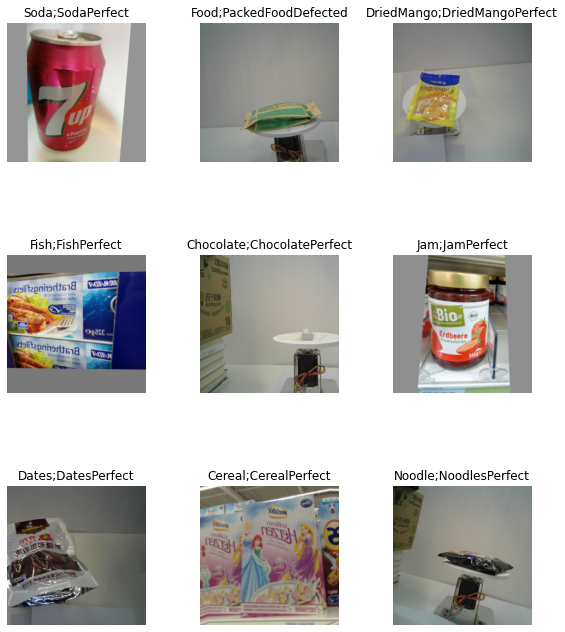

In [12]:
data.show_batch(rows=3, figsize=(8,10))
print(f"""Classes in our data: {data.classes}\n
Number of classes: {data.c}\n
Training Dataset Length: {len(data.train_ds)}\n
Validation Dataset Length: {len(data.valid_ds)}""")

In [13]:
acc_02 = partial(accuracy_thresh, thresh=0.2) 
learn = cnn_learner(data, models.vgg19_bn, metrics=acc_02, model_dir='models')

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth


In [14]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 256, 256]       1,792      False     
______________________________________________________________________
BatchNorm2d          [64, 256, 256]       128        True      
______________________________________________________________________
ReLU                 [64, 256, 256]       0          False     
______________________________________________________________________
Conv2d               [64, 256, 256]       36,928     False     
______________________________________________________________________
BatchNorm2d          [64, 256, 256]       128        True      
______________________________________________________________________
ReLU                 [64, 256, 256]       0          False     
______________________________________________________________________
MaxPool2d            [64, 128, 128]       0          False     
___________________________________________________

In [15]:
learn.fit_one_cycle(2) # Training only the lastlayer (i.e fully connected layer)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.506763,0.069465,0.986613,14:57
1,0.134383,0.047983,0.988151,14:16


In [16]:
model1 = learn.save('stage-1-vgg19_bn')
torch.save(model1 , "vgg19_bn_1")

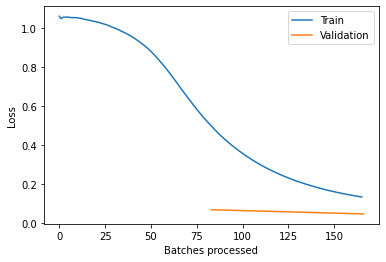

In [17]:
learn.recorder.plot_losses() #Graph before unfreezing the layers

In [18]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


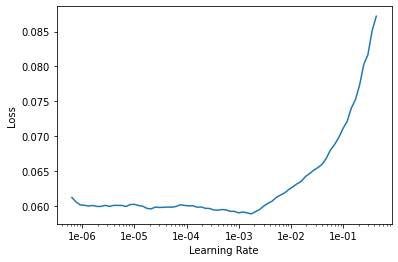

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(2, slice(3e-5, 5e-4))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.052369,0.035818,0.989836,14:45
1,0.041353,0.030556,0.991637,14:41


In [21]:
model2 = learn.save('stage-2-vgg19_bn')
torch.save(model2 , 'vgg19_bn_2')

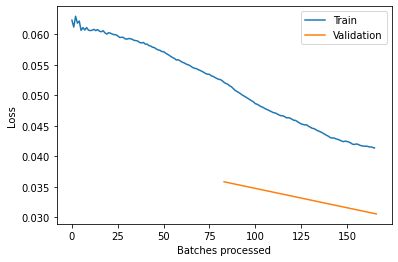

In [22]:
learn.recorder.plot_losses()